# Spam SMS Classification using NLP

In [2]:
import numpy as np
import pandas as pd

## Dataset 

In [3]:
data=pd.read_csv('spam.csv',encoding='latin-1')
print(data)
print(data.shape)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


## 1.DATA CLEANING

In [4]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4']
d=data.drop(columns=columns_to_drop)
d

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
d.rename(columns={'v1':'target','v2':'text'},inplace=True)
d

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
d['target']=d['target'].replace({'spam':1,'ham':0})
print('spam:1 , ham:0')
print(d)

spam:1 , ham:0
      target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [7]:
# Checking for duplicate values and removing it
duplicate=d.duplicated().sum()
print(duplicate)
d = d.drop_duplicates(keep='first')
print(d.duplicated().sum())
d.shape

403
0


(5169, 2)

# 2. Exploratory Data Analysis

,Spam,Ham
Count,653,4516


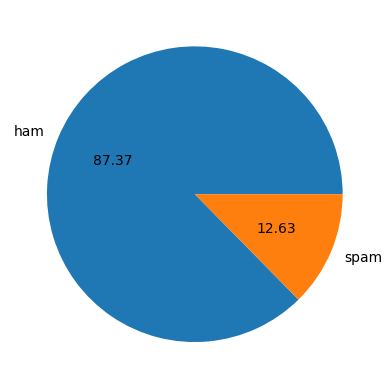

In [8]:
import matplotlib.pyplot as plt
labels = ['Ham', 'Spam']
counts = [d['target'].value_counts()[0],
          d['target'].value_counts()[1]]

df_count = pd.DataFrame({'Spam':counts[1],
                    'Ham':counts[0]}, index = ['Count'])
display(df_count)
plt.pie(d['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [9]:
#importint NLTK (Natural Language Toolkit) library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#Extracting new features from the text
d['num_characters'] = d['text'].apply(len)
d
# num of words
d['num_words'] = d['text'].apply(lambda x:len(nltk.word_tokenize(x)))
d['num_sentences'] = d['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
print(d.head())

C:\Users\prita\AppData\Local\Temp\ipykernel_14744\1284947363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['num_characters'] = d['text'].apply(len)


   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1  


C:\Users\prita\AppData\Local\Temp\ipykernel_14744\1284947363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['num_words'] = d['text'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\prita\AppData\Local\Temp\ipykernel_14744\1284947363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['num_sentences'] = d['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [11]:
print('Dataset Description:\n',d[['num_characters','num_words','num_sentences']].describe())
print('Dataset Description for Ham messages:\n',d[d['target'] == 0][['num_characters','num_words','num_sentences']].describe())
print('Dataset Description for Spam messages:\n',d[d['target'] == 1][['num_characters','num_words','num_sentences']].describe())


Dataset Description:
        num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000
Dataset Description for Ham messages:
        num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000
Dataset Description for Spam messages:


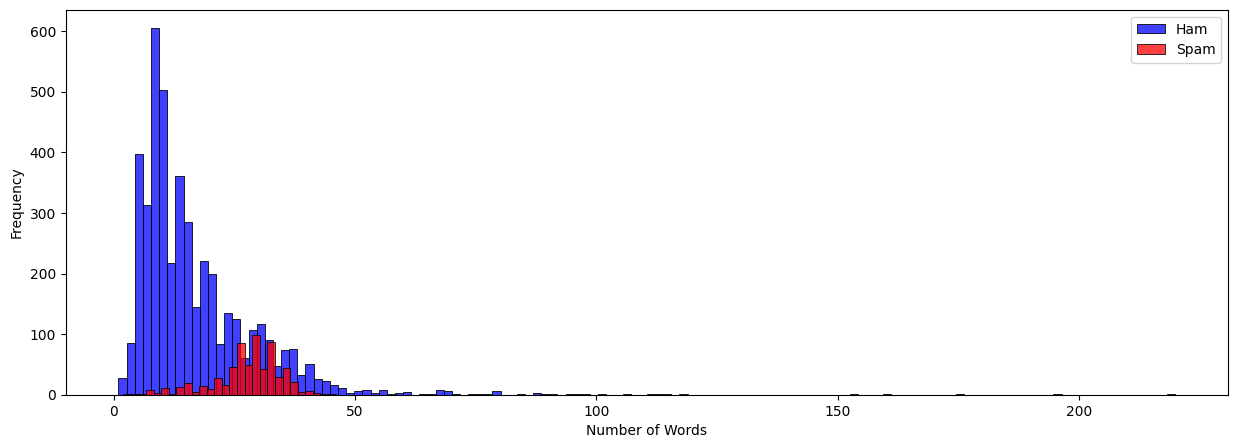

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig2 = plt.figure(figsize=(15, 5))
sns.histplot(d[d['target'] == 0]['num_words'], label='Ham', color='blue')
sns.histplot(d[d['target'] == 1]['num_words'], label='Spam', color='red')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

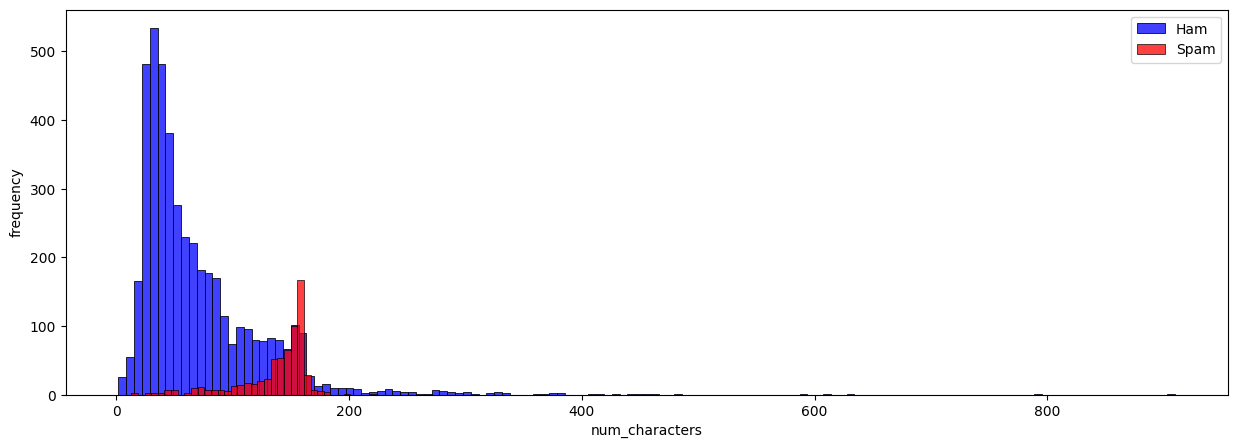

In [13]:
fig2 = plt.figure(figsize=(15, 5))
sns.histplot(d[d['target'] == 0]['num_characters'], label='Ham', color='blue')
sns.histplot(d[d['target'] == 1]['num_characters'], label='Spam', color='red')
plt.xlabel('num_characters')
plt.ylabel('frequency')
plt.legend()
plt.show()

From the Extracted feature number of characters is more dominating by visualising above plots

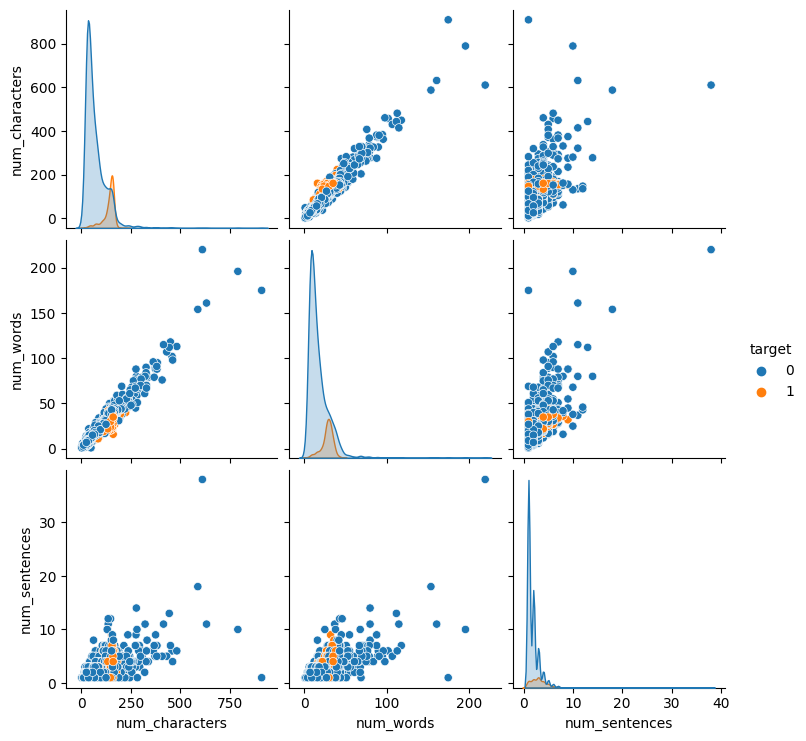

In [14]:
sns.pairplot(d,hue='target')

From the Extracted feature number of characters is more dominating by visualising above plots

# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:

#Now I will make all the letters to lower case and romove stopwords and puctuation and then doing stemming
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    x = []
    for i in text:
        if i.isalnum():#If all the characters in i are either letters (a-z, A-Z) or digits (0-9), then i.isalnum() will return True.
            x.append(i)

    text = x[:] #make a copy of y to text :coloning
    x.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  # punctuation:$%&'()*+,-./:;<=>?@[\]^_`{|}~
            x.append(i)
    text = x[:]
    x.clear()

    for i in text:
        x.append(ps.stem(i))
    return " ".join(x) # return as a string not list'''
    return text
print(transform_text(d['text'][10]))

gon na home soon want talk stuff anymor tonight k cri enough today


In [17]:
#Now adding features as transformed_text
d['transformed_text'] = d['text'].apply(transform_text)
d.head()

C:\Users\prita\AppData\Local\Temp\ipykernel_14744\1523402100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['transformed_text'] = d['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


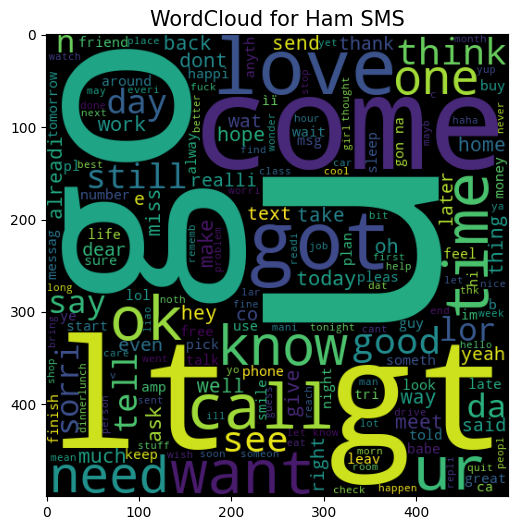

In [18]:
#Now visualising the Ham sms words using wordcloud
from wordcloud import WordCloud
def word_cloud(data,typ):
    wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
    wc1 = wc.generate(d[d['target'] == data]['transformed_text'].str.cat(sep=" "))
    plt.figure(figsize=(15,6))
    plt.title(f'WordCloud for {typ} SMS', fontsize=15)
    plt.imshow(wc1)
word_cloud(0,typ='Ham')

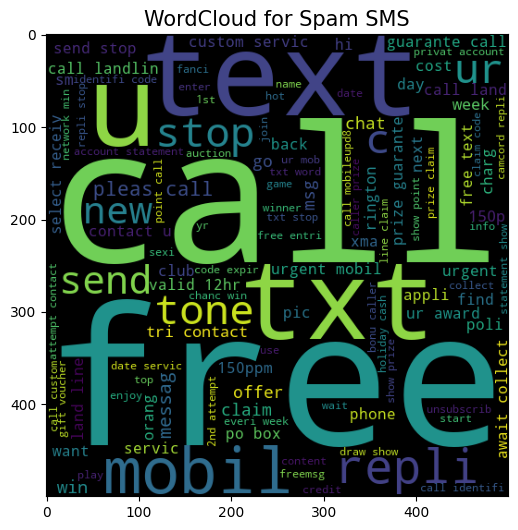

In [19]:
#Now visualising the Ham sms words using wordcloud
word_cloud(1,typ='Spam')

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

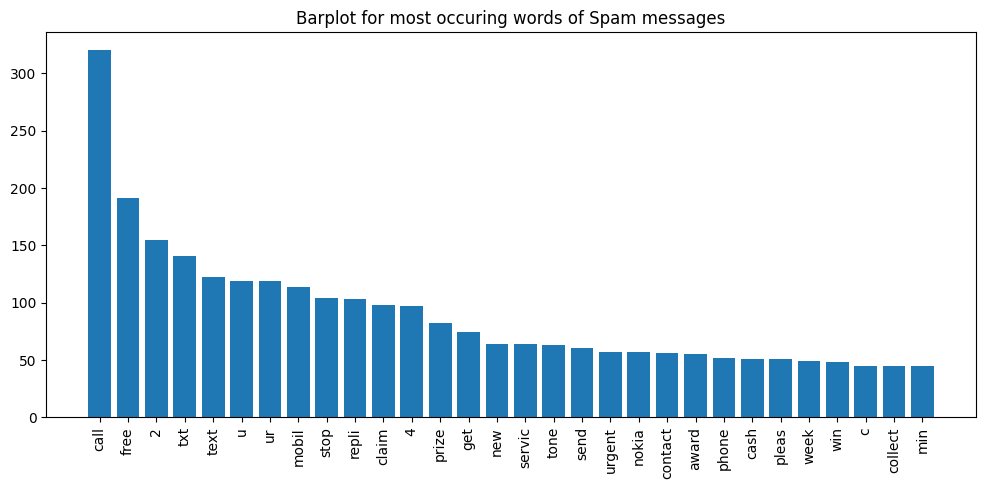

In [20]:
#Barplot for most occuring words of Spam messages
spam_SMS = []
for msg in d[d['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_SMS.append(word)
print(spam_SMS)
print(len(spam_SMS))
from collections import Counter
plt.figure(figsize=(12,5))
plt.bar(pd.DataFrame(Counter(spam_SMS).most_common(30))[0],pd.DataFrame(Counter(spam_SMS).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Barplot for most occuring words of Spam messages')
plt.show()

35404


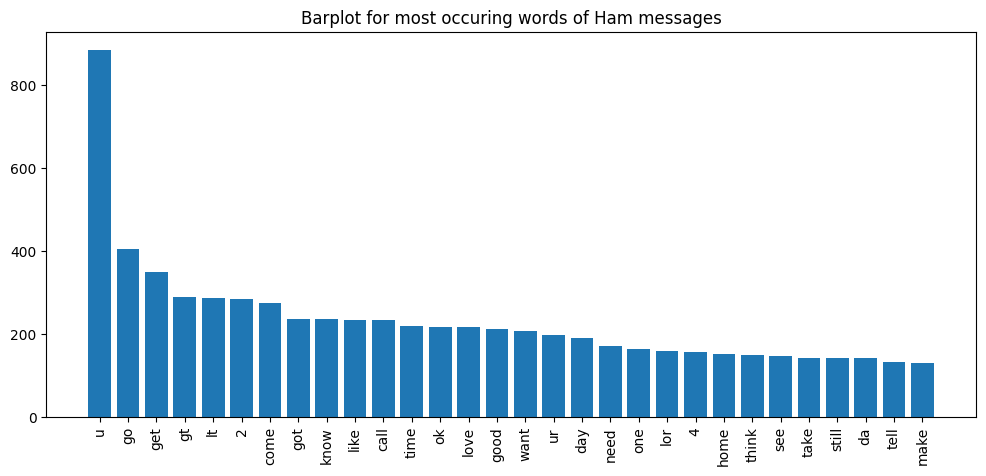

In [21]:
#Barplot for most occuring words of Ham messages
ham_SMS = []
for msg in d[d['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_SMS.append(word)
print(len(ham_SMS))
from collections import Counter
plt.figure(figsize=(12,5))
plt.bar(pd.DataFrame(Counter(ham_SMS).most_common(30))[0],pd.DataFrame(Counter(ham_SMS).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Barplot for most occuring words of Ham messages')
plt.show()

In [22]:
print(max(d['num_words']))

220


In [23]:
d.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [24]:
d['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

This is a highly imbalanced dataset, with a significant difference between the majority and minority classes. In such cases, applying SMOTE is beneficial to balance the class distribution before training

# 4. Model Building

In [25]:
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

### Vectorization

In [26]:

#cv = CountVectorizer()
#cv = CountVectorizer(ngram_range=(2,2))
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(d['transformed_text']).toarray()
#X=cv.fit_transform(d['transformed_text']).toarray()
#X=cv.fit_transform(d['transformed_text']).toarray()
print(X)
#print(cv.fit_transform(d['transformed_text']))
y = d['target'].values
#print(tfidf.fit_transform(d['transformed_text']))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


TF(term) = (Number of times the term appears in the document) / (Total number of terms in the document)

IDF(term) = log((Total number of documents in the corpus) / (Number of documents containing the term))

As number of words is not much descriminitive feature but number of characters is somewhat descriminitive so we experiment with this feature

In [27]:
# appending the num_character col to X
#X = np.hstack((X,d['num_characters'].values.reshape(-1,1)))
#print(d['num_characters'].values.reshape(-1,1))
#print(X)

By appending the num_character col to X most of the algorithms doesnt perform well i didn't use these feature

In [28]:
from sklearn.model_selection import train_test_split
X_trainv,X_test,y_trainv,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X_trainv)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


SMOTE Analysis

In [29]:
pip install scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
pip install --upgrade scikit-learn imbalanced-learn


  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Rolling back uninstall of scikit-learn
  Moving to c:\users\prita\anaconda3\lib\site-packages\scikit_learn-1.2.2.dist-info\
   from C:\Users\prita\anaconda3\Lib\site-packages\~cikit_learn-1.2.2.dist-info
  Moving to c:\users\prita\anaconda3\lib\site-packages\sklearn\__check_build\__init__.py
   from C:\Users\prita\AppData\Local\Temp\pip-uninstall-z3zo4009\__init__.py
  Moving to c:\users\prita\anaconda3\lib\site-packages\sklearn\__check_build\__pycache__\
   from C:\Users\prita\anaconda3\Lib\site-packages\sklearn\__check_build\~_pycache__
  Moving to c:\users\prita\anaconda3\lib\site-packages\sklearn\__check_build\_check_build.cp311-win_amd64.pyd
   from C:\Users\prita

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\prita\\anaconda3\\Lib\\site-packages\\sklearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from imblearn.over_sampling import SMOTE
# # Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_trainv, y_trainv)

In [32]:
# X_train=X_trainv
# y_train =y_trainv 
# Count the number of occurrences of each value
counts = np.bincount(y_train)
counts

array([3620, 3620], dtype=int64)

Creating a function for evaluation of each model

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Initialize and train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = 100 * accuracy_score(y_test, y_pred)
    precision = 100 * precision_score(y_test, y_pred)  # Use 'weighted' for multi-class
    f1 = 100 * f1_score(y_test, y_pred)  # Use 'weighted' for multi-class
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
#, average='weighted'
    # Print metrics
    print(f'{model_name} Results:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1 Score:', f1)
    print('Confusion Matrix:\n', conf_matrix)
    print('Classification Report:\n', classification_report(y_test, y_pred))

    # Plotting the confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    return accuracy, precision, f1


Model:  GaussianNB

In [34]:
# Dictionary to store results
results = {}


Evaluating GaussianNB...

GaussianNB Results:
Accuracy: 87.9110251450677
Precision: 53.051643192488264
F1 Score: 64.38746438746439
Confusion Matrix:
 [[796 100]
 [ 25 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.53      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.79      1034
weighted avg       0.91      0.88      0.89      1034



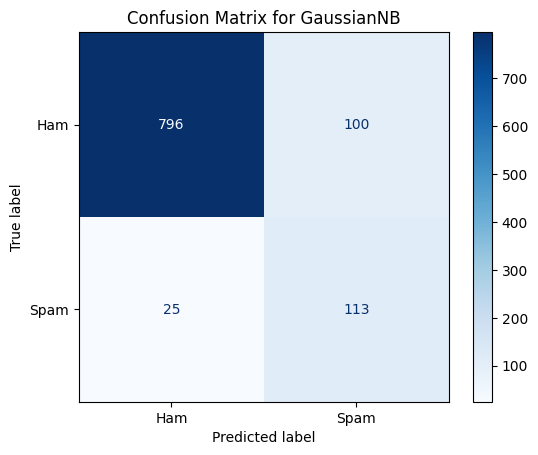

In [35]:
from sklearn.naive_bayes import GaussianNB

# Define and evaluate the GaussianNB model
gnb = GaussianNB()
print('\nEvaluating GaussianNB...\n')
accuracy, precision, f1 = evaluate_model(gnb, 'GaussianNB', X_train, y_train, X_test, y_test)
results['GaussianNB'] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}


Model:  MultinomialNB

Multinomial Naive Bayes (MNB): MNB is primarily used for discrete data, such as text data. It is well-suited for tasks where the features represent counts, like word frequencies in documents.


Evaluating MultinomialNB...

MultinomialNB Results:
Accuracy: 96.42166344294004
Precision: 83.89261744966443
F1 Score: 87.10801393728222
Confusion Matrix:
 [[872  24]
 [ 13 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.84      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034



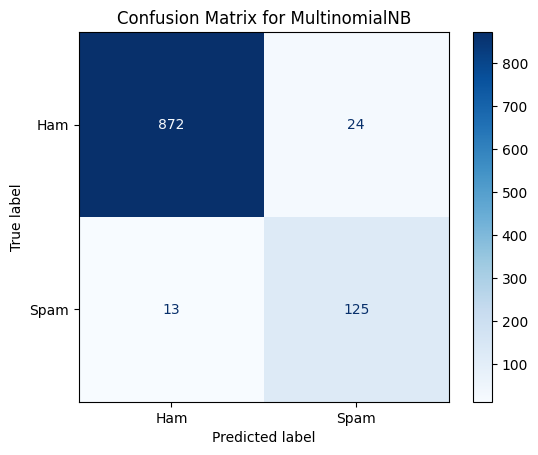

In [36]:
from sklearn.naive_bayes import MultinomialNB

# Define and evaluate the MultinomialNB model
mnb = MultinomialNB()
print('\nEvaluating MultinomialNB...\n')
accuracy, precision, f1 = evaluate_model(mnb, 'MultinomialNB', X_train, y_train, X_test, y_test)
results['MultinomialNB'] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

Model: Support Vector Machine

Sigmoid Kernel: The sigmoid kernel is often used for binary classification and is defined as:
K(x, x') = tanh(γ * (x^T * x') + r)
γ (gamma) is a scale factor.
r is a constant term.
This kernel is similar to the sigmoid function used in neural networks.


Evaluating SVM...

SVM Results:
Accuracy: 97.77562862669245
Precision: 95.2755905511811
F1 Score: 91.32075471698113
Confusion Matrix:
 [[890   6]
 [ 17 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.88      0.91       138

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



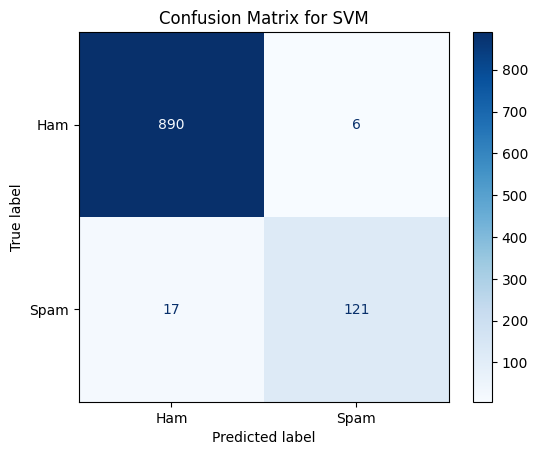

In [37]:
from sklearn.svm import SVC

# Define and evaluate the SVM model
model_svc = SVC(kernel='sigmoid', gamma=1)
print('\nEvaluating SVM...\n')
accuracy, precision, f1 = evaluate_model(model_svc, 'SVM', X_train, y_train, X_test, y_test)
results['SVM'] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

Model: RandomForestClassifier


Evaluating Random Forest...

Random Forest Results:
Accuracy: 97.96905222437138
Precision: 99.15966386554622
F1 Score: 91.82879377431907
Confusion Matrix:
 [[895   1]
 [ 20 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



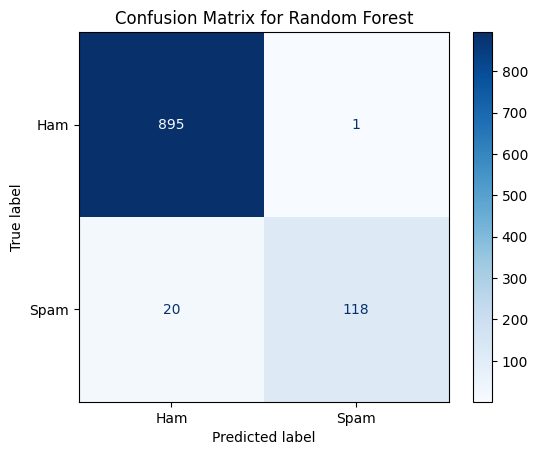

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Define and evaluate the RandomForestClassifier model
model_randForest = RandomForestClassifier(n_estimators=100, criterion='entropy')
print('\nEvaluating Random Forest...\n')
accuracy, precision, f1 = evaluate_model(model_randForest, 'Random Forest', X_train, y_train, X_test, y_test)
results['Random Forest'] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

Model: AdaBoostClassifier


Evaluating AdaBoost...



c:\Users\prita\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Accuracy: 97.09864603481626
Precision: 92.85714285714286
F1 Score: 88.63636363636364
Confusion Matrix:
 [[887   9]
 [ 21 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       896
           1       0.93      0.85      0.89       138

    accuracy                           0.97      1034
   macro avg       0.95      0.92      0.93      1034
weighted avg       0.97      0.97      0.97      1034



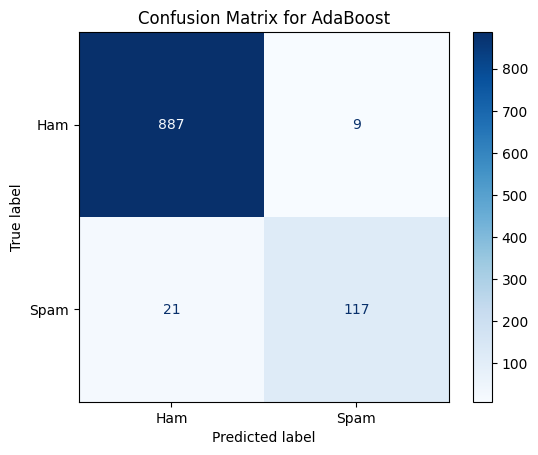

In [39]:
from sklearn.ensemble import AdaBoostClassifier

# Define and evaluate the AdaBoostClassifier model
adb = AdaBoostClassifier()
print('\nEvaluating AdaBoost...\n')
accuracy, precision, f1 = evaluate_model(adb, 'AdaBoost', X_train, y_train, X_test, y_test)
results['AdaBoost'] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

Model: Logistic Regression


Evaluating Logistic Regression...

Logistic Regression Results:
Accuracy: 97.77562862669245
Precision: 94.57364341085271
F1 Score: 91.38576779026218
Confusion Matrix:
 [[889   7]
 [ 16 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       896
           1       0.95      0.88      0.91       138

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



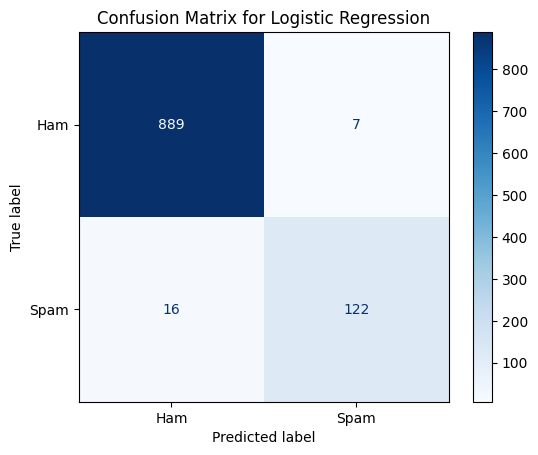

In [40]:
from sklearn.linear_model import LogisticRegression

# Define and evaluate the LogisticRegression model
lr = LogisticRegression(max_iter=1000)
print('\nEvaluating Logistic Regression...\n')
accuracy, precision, f1 = evaluate_model(lr, 'Logistic Regression', X_train, y_train, X_test, y_test)
results['Logistic Regression'] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

The vocab_size should be set to the number of unique words or tokens in your entire dataset. This represents the size of your vocabulary.

validation accuracy-It tells you the percentage of correct predictions the model made on data it hasn't seen during training.

Model: Long Short-Term Memory(LSTM)

In [41]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(d['transformed_text'])
X_sequences = tokenizer.texts_to_sequences(d['transformed_text'])
X_padded = pad_sequences(X_sequences, maxlen=100)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(d['target'])
y = np.expand_dims(y, axis=-1)  # Convert labels to shape (num_samples, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=2)

# Define and train LSTM model
def build_lstm_model(input_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=128, input_length=input_length))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Single neuron for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model(input_dim=10000, input_length=100)
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10


C:\Users\prita\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.8784 - loss: 0.3337 - val_accuracy: 0.9686 - val_loss: 0.1016
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9907 - loss: 0.0483 - val_accuracy: 0.9758 - val_loss: 0.0796
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9995 - loss: 0.0117 - val_accuracy: 0.9758 - val_loss: 0.0956
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9988 - loss: 0.0065 - val_accuracy: 0.9746 - val_loss: 0.1355
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.9770 - val_loss: 0.1174
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9758 - val_loss: 0.1476
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9770 - val_loss: 0.1484
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 1.0000 - loss: 7.0191e-04 - val_accuracy: 0


Evaluating LSTM...

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
LSTM Results:
Accuracy: 98.25918762088975
Precision: 96.875
F1 Score: 93.23308270676691
Confusion Matrix:
 [[892   4]
 [ 14 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.90      0.93       138

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



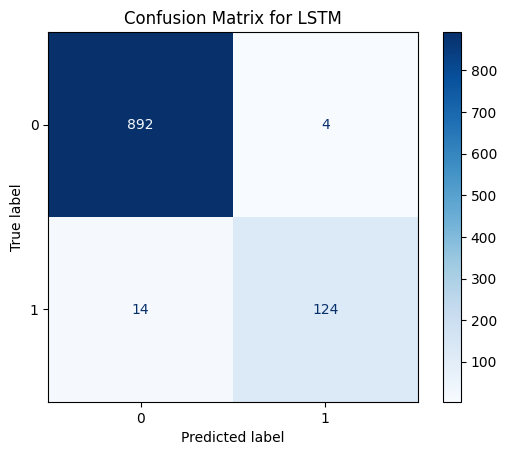

In [42]:
# Evaluate LSTM model
def evaluate_lstm_model(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary classes

    accuracy = 100 * accuracy_score(y_test, y_pred)
    precision = 100 * precision_score(y_test, y_pred)
    f1 = 100 * f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print('LSTM Results:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1 Score:', f1)
    print('Confusion Matrix:\n', conf_matrix)
    print('Classification Report:\n', classification_report(y_test, y_pred))

    # Plotting the confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix for LSTM')
    plt.show()

    return accuracy, precision, f1
# Dictionary to store results
# Evaluate LSTM
print('\nEvaluating LSTM...\n')
accuracy, precision, f1 = evaluate_lstm_model(lstm_model, X_test, y_test)
results['LSTM'] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}


### Comparisons of Models

In [43]:
# Convert results dictionary to DataFrame for comparison
results_df = pd.DataFrame(results).T
#results_df = results_df.sort_values(by='Precision', ascending=False)  # Sort by Accuracy

print('\nModel Comparison Table:\n')
print(results_df)



Model Comparison Table:

                      Accuracy  Precision   F1 Score
GaussianNB           87.911025  53.051643  64.387464
MultinomialNB        96.421663  83.892617  87.108014
SVM                  97.775629  95.275591  91.320755
Random Forest        97.969052  99.159664  91.828794
AdaBoost             97.098646  92.857143  88.636364
Logistic Regression  97.775629  94.573643  91.385768
LSTM                 98.259188  96.875000  93.233083


-In the context of a spam classifier, precision is often more crucial than overall accuracy because false positives (legitimate emails marked as spam) can be highly inconvenient or damaging. Users are likely to be frustrated if important emails are sent to the spam folder. Therefore,It should have high precision, even if it means a lower overall accuracy.
Hence I am using Multinomial naive bayes classifier as a final model

Now Checking this Model using some random messages

In [44]:
#t='I will call you later' 
#t='Free Prizes, Gift Cards or Coupons.'
t='Urngently meet me at the lake'
#t='congratulations! You’ve won a $500 Amazon gift card. Claim it here [Link]'
#t='Congratulations! Your credit score entitles you to a no-interest Visa credit card. Click here to claim'
#t='congratulations! you won 1000 call on this number to get your prize'
# Transform the new text using the same TF-IDF vectorizer
t_tfidf = tfidf.transform([transform_text(t)])
#t_tfidf = cv.transform([transform_text(t)])
# Make predictions
y_pred1 = mnb.predict(t_tfidf.toarray())

if y_pred1 == 1:
    print('Spam')
else:
    print('Not Spam')


Not Spam
